In [ ]:
# !pip install xlrd

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)

In [3]:
df

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
0,Abkhazia,Eurasia,t,2022,PF,5,5,2,2,1,...,1,1,4,1,1,2,1,5,23,40
1,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,0,0,0,0,1,0,1,2,9,10
2,Albania,Europe,c,2022,PF,3,3,3,3,3,...,2,3,9,3,2,2,2,9,39,67
3,Algeria,Africa,c,2022,NF,6,5,1,1,1,...,2,2,6,2,2,2,1,7,22,32
4,Andorra,Europe,c,2022,F,1,1,4,4,4,...,4,3,15,4,4,3,4,15,55,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,West Bank,Middle East,t,2013,NF,6,5,0,0,2,...,0,1,5,1,1,2,1,5,24,30
2091,Western Sahara,Africa,t,2013,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,5
2092,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0,1,2,2,1,1,1,5,16,25
2093,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,2,2,8,3,2,1,2,8,34,62


In [4]:
df['Status'].value_counts()

F     876
PF    632
NF    587
Name: Status, dtype: int64

In [5]:
## number of countries/territories in one of the three freedom status by year

status_by_year = pd.DataFrame(df.groupby(['Edition','Status']).size())
status_by_year.reset_index(inplace=True)
status_by_year.columns = ['year', 'status', 'count']
status_by_year

,year,status,count
0,2013,F,92
1,2013,NF,54
2,2013,PF,63
3,2014,F,90
4,2014,NF,55
5,2014,PF,64
6,2015,F,91
7,2015,NF,59
8,2015,PF,60
9,2016,F,88


In [ ]:
# status_by_year
sns.barplot(x='year', y='count', hue='status', data=status_by_year, palette="flare")


** NOTES **

Uisng a barplot to represent the number of countries in ech status by year, it's not that esy to see
the trend or which direction countries are going in general. it's not really telling

In [ ]:
ax = sns.pointplot(x="year", y="count", hue="status", hue_order=['F','PF','NF'], data=status_by_year,
                  palette=['mediumseagreen','goldenrod','tomato'])
ax.set(xlabel='Year', ylabel='Number of Countries/Territories',
       title='Number countries by freedom designation from 2013 to 2022')

handlesObj, labels = ax.get_legend_handles_labels()

plt.legend(labels=['Free','Partly Free','Not Free'], handles=handlesObj, loc=7,
           bbox_to_anchor=(1.3, .6), title='Freedom Status')


** NOTES **

Using a dot plot and connecting the datapoints for the same status for all years, it shows adecrease in the number of countries considered free with the most significant dip happening in the years
2018-2021. It is also clear to see the the number of countries considered noot free increasing starting from 2017
and having a significant jup in 2020.
It is also interesting to see how the partly free and not free trends tend to move in opposite direction
from each other. When the number of partly free countries is somewhat steady so is the number of not free countries,
but when there is a significant dip or jump, we can see the opposite happening in the not free countries.

A POTENTIAL HYPOTHESIS:

There seems to a potential relationship berween number of partly free and not free countries, this couls mean that because partly free countries' institutions are more vulnerable to attacks on democracy and freedom, the flunctuation of not free countries is mostly dependent on partly free countries and how well they are able to solidy freedom?

NEXT STEPS:
* group by region as well to see the trends and and see which regions have the most concentration of not free countries that can be the cause of international conflict
* since there are significantly more free countries than both not free and partly free, mayeb concentarte on the latter too and plot other features to see what are some tendecies.
*...


In [6]:
status_by_region = pd.DataFrame(df.groupby(['Edition','Status','Region']).size())
status_by_region.reset_index(inplace=True)
status_by_region.rename(columns={0:'count'}, inplace=True)
status_by_region['Region'].unique()


array(['Africa', 'Americas', 'Asia', 'Europe', 'Middle East', 'Eurasia'],
      dtype=object)

In [7]:
status_by_region

,Edition,Status,Region,count
0,2013,F,Africa,11
1,2013,F,Americas,25
2,2013,F,Asia,17
3,2013,F,Europe,38
4,2013,F,Middle East,1
...,...,...,...,...
160,2022,PF,Americas,8
161,2022,PF,Asia,14
162,2022,PF,Eurasia,6
163,2022,PF,Europe,7


In [ ]:
NF_by_region = status_by_region.loc[(status_by_region['Status'] == 'NF'),]

ax = sns.pointplot(x='Edition', y='count', hue='Region', data=NF_by_region)
ax.set(xlabel="Year", ylabel="Number of Countries/Territories", title="Number of Not Free countries/Territories by Region")

handlesObj, labels = ax.get_legend_handles_labels()

plt.legend(handles=handlesObj, loc=7,
           bbox_to_anchor=(1.3, .6), title='Region')
## NOTE:
## The pointplot helps to see the direction of the trend more easily but since some pointS overlap for
## different regions it can be cofusing and the trend lines for some regions lokk cut off.

In [ ]:
NF_by_region

In [ ]:
ax = sns.catplot(x='Edition', y='count', hue='Region', data=NF_by_region)


In [ ]:
ax= sns.catplot(x='Edition', y='count', hue='Region', col='Status', data=status_by_region, kind="bar", aspect=1, height=6)


Political Rights and Civil Liberties core for countries/territories with Not Free and Partly Free status

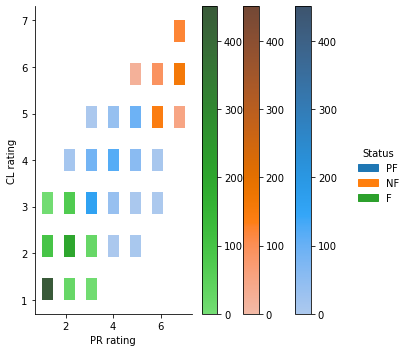

In [8]:
ratings = df
# del ratings['C/T']
# del ratings['Total']
rt = ratings[['Country/Territory', 'Region', 'Edition', 'Status', 'PR rating', 'CL rating']]
rt
# density distribution of ratings according to status, maybe region, 
ax = sns.displot(rt, x="PR rating", y="CL rating", hue="Status", cbar=True)

In [ ]:
rt

In [ ]:
sns.displot(rt, x="PR rating", y="CL rating", hue="Status", rug=True)

In [ ]:
ax = sns.jointplot(data=rt, x="PR rating", y="CL rating", hue="Status")

In [ ]:
g = sns.JointGrid(data=rt, x="PR rating", y="CL rating", hue="Status")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

In [ ]:
sns.relplot(data=rt, x="PR rating", y="CL rating", hue="Status")
sns.rugplot(data=rt, x="PR rating", y="CL rating", hue="Status")

In [ ]:
sns.relplot(x="PR rating", y="CL rating", hue="Region", style="Status", data=rt);

In [ ]:
sns.lmplot(x="PR rating", y="CL rating", data=rt);

In [ ]:
sns.lmplot(x="PR rating", y="CL rating", hue="Status", data=rt);

In [14]:
dem = pd.read_excel('List_of_Electoral_Democracies_FIW22.xlsx', sheet_name = 0, header=1)
dem.columns = ['country', 'dem_elec']
dem

,country,dem_elec
0,Afghanistan,No
1,Albania,Yes
2,Algeria,No
3,Andorra,Yes
4,Angola,No
...,...,...
190,Venezuela,No
191,Vietnam,No
192,Yemen,No
193,Zambia,No


In [13]:
# countries_22 = df[df['Edition'] == 2022]
# del countries_22['C/T']
# del countries_22['Region']
# del countries_22['Edition']
# del countries_22['Total']
# del countries_22['Add Q']
# del countries_22['Add A']
countries_22.rename(columns = {'Country/Territory':'country'}, inplace = True)
countries_22

C:\Users\ariad\anaconda3\envs\cs418env\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,country,Status,PR rating,CL rating,A1,A2,A3,A,B1,B2,...,F2,F3,F4,F,G1,G2,G3,G4,G,CL
0,Abkhazia,PF,5,5,2,2,1,5,2,3,...,1,1,1,4,1,1,2,1,5,23
1,Afghanistan,NF,7,6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2,9
2,Albania,PF,3,3,3,3,3,9,3,3,...,2,2,3,9,3,2,2,2,9,39
3,Algeria,NF,6,5,1,1,1,3,1,1,...,1,2,2,6,2,2,2,1,7,22
4,Andorra,F,1,1,4,4,4,12,4,4,...,4,4,3,15,4,4,3,4,15,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,West Bank,NF,7,5,0,0,1,1,1,0,...,1,0,1,4,1,1,2,1,5,19
206,Western Sahara,NF,7,7,0,0,0,0,0,0,...,0,0,0,0,1,1,2,0,4,7
207,Yemen,NF,7,6,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,2,8
208,Zambia,PF,4,4,2,2,2,6,2,3,...,2,2,2,8,3,2,2,1,8,30


In [15]:
c_22 = countries_22.merge(dem[['country', 'dem_elec']], on = 'country', how = 'inner')
c_22

,country,Status,PR rating,CL rating,A1,A2,A3,A,B1,B2,...,F3,F4,F,G1,G2,G3,G4,G,CL,dem_elec
0,Afghanistan,NF,7,6,0,0,0,0,0,0,...,0,0,0,0,1,0,1,2,9,No
1,Albania,PF,3,3,3,3,3,9,3,3,...,2,3,9,3,2,2,2,9,39,Yes
2,Algeria,NF,6,5,1,1,1,3,1,1,...,2,2,6,2,2,2,1,7,22,No
3,Andorra,F,1,1,4,4,4,12,4,4,...,4,3,15,4,4,3,4,15,55,Yes
4,Angola,NF,6,5,0,2,1,3,1,1,...,1,2,5,1,1,1,0,3,20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,NF,7,6,0,0,0,0,0,0,...,0,1,1,1,1,2,0,4,13,No
190,Vietnam,NF,7,6,0,0,0,0,0,0,...,1,1,4,2,1,3,2,8,16,No
191,Yemen,NF,7,6,0,0,0,0,1,0,...,0,0,1,0,1,1,0,2,8,No
192,Zambia,PF,4,4,2,2,2,6,2,3,...,2,2,8,3,2,2,1,8,30,No


In [16]:
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [17]:
X = c_22.iloc[:, 2:-1]
y = c_22.iloc[:, -1]
X.dropna()
X
# y

,PR rating,CL rating,A1,A2,A3,A,B1,B2,B3,B4,...,F2,F3,F4,F,G1,G2,G3,G4,G,CL
0,7,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2,9
1,3,3,3,3,3,9,3,3,3,3,...,2,2,3,9,3,2,2,2,9,39
2,6,5,1,1,1,3,1,1,1,1,...,1,2,2,6,2,2,2,1,7,22
3,1,1,4,4,4,12,4,4,4,3,...,4,4,3,15,4,4,3,4,15,55
4,6,5,0,2,1,3,1,1,1,2,...,1,1,2,5,1,1,1,0,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,7,6,0,0,0,0,0,0,0,1,...,0,0,1,1,1,1,2,0,4,13
190,7,6,0,0,0,0,0,0,0,1,...,1,1,1,4,2,1,3,2,8,16
191,7,6,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,2,8
192,4,4,2,2,2,6,2,3,3,3,...,2,2,2,8,3,2,2,1,8,30


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  random_state = 1)
# X_train
y_test

44     Yes
172     No
163     No
35      No
136    Yes
11     Yes
123     No
82     Yes
175    Yes
102     No
174     No
180    Yes
29      No
16     Yes
143    Yes
166    Yes
28     Yes
51      No
31     Yes
122     No
47      No
4       No
98     Yes
56      No
78     Yes
58     Yes
132    Yes
124     No
53      No
127    Yes
67      No
120    Yes
59     Yes
97     Yes
187     No
14     Yes
40     Yes
19     Yes
110    Yes
112    Yes
114     No
167     No
69     Yes
152    Yes
33      No
89      No
154     No
188    Yes
105    Yes
Name: dem_elec, dtype: object

In [19]:
X_train = pd.DataFrame(X_train)
X_train = X_train.astype(float)
X_train
X_train.dropna()

,PR rating,CL rating,A1,A2,A3,A,B1,B2,B3,B4,...,F2,F3,F4,F,G1,G2,G3,G4,G,CL
107,1.0,2.0,4.0,4.0,3.0,11.0,4.0,4.0,4.0,3.0,...,4.0,3.0,3.0,13.0,4.0,3.0,3.0,2.0,12.0,50.0
42,1.0,2.0,4.0,4.0,4.0,12.0,4.0,4.0,3.0,3.0,...,3.0,3.0,2.0,11.0,4.0,3.0,3.0,3.0,13.0,49.0
17,2.0,1.0,4.0,4.0,4.0,12.0,4.0,4.0,4.0,2.0,...,3.0,3.0,3.0,13.0,4.0,3.0,3.0,3.0,13.0,53.0
5,2.0,2.0,4.0,4.0,4.0,12.0,3.0,4.0,3.0,3.0,...,3.0,4.0,3.0,14.0,4.0,3.0,3.0,3.0,13.0,52.0
117,2.0,2.0,4.0,4.0,3.0,11.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,11.0,3.0,3.0,2.0,2.0,10.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,3.0,3.0,3.0,4.0,3.0,10.0,3.0,4.0,3.0,2.0,...,1.0,2.0,2.0,7.0,3.0,3.0,2.0,2.0,10.0,37.0
137,1.0,1.0,4.0,4.0,4.0,12.0,4.0,4.0,4.0,4.0,...,4.0,3.0,3.0,14.0,4.0,4.0,4.0,3.0,15.0,56.0
72,3.0,3.0,3.0,3.0,3.0,9.0,3.0,2.0,3.0,3.0,...,3.0,3.0,2.0,10.0,4.0,3.0,3.0,3.0,13.0,43.0
140,7.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,7.0,14.0


In [20]:
SVM = svm.LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9795918367346939


C:\Users\ariad\anaconda3\envs\cs418env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_pred

### Predicting whether a country is an electoral democracy or not based on factor such as Political Rights, Civil Liberties, Freedom of Expression, etc.
Data is from a list of countries and a binary feature 'yes' or 'not' representing whether a countries election was considered democrtic in 2022